# Breast Cancer Wisconsin (Diagnostic) 

Dataset link : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [1]:
!pip install modin


     |████████████████████████████████| 970 kB 7.7 MB/s            
     |████████████████████████████████| 962 kB 54.4 MB/s            
     |████████████████████████████████| 957 kB 66.3 MB/s            
     |████████████████████████████████| 956 kB 55.6 MB/s            
     |████████████████████████████████| 956 kB 61.2 MB/s            
     |████████████████████████████████| 761 kB 42.9 MB/s            
     |████████████████████████████████| 11.3 MB 64.8 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.4.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl

In [2]:
!pip install scikit-learn-intelex


     |████████████████████████████████| 115 kB 6.6 MB/s            
     |████████████████████████████████| 13.7 MB 46.6 MB/s            
     |████████████████████████████████| 69.2 MB 74.7 MB/s            
     |████████████████████████████████| 4.0 MB 62.8 MB/s            


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# Importing libraries
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [5]:
# Reading the dataset info pandas dataframe

df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
%time

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs


In [6]:
# viewing 1st 5rows
df.head()
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs


In [7]:
# determining size of data
df.shape
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [8]:
df.info()
%time

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  -----------------------  --------------  -----  
 0   id                       569 non-null    int64
 1   diagnosis                569 non-null    object
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se            

In [9]:
df.describe()
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


Checking target column distribution 

In [10]:
malignant_count = len(df.loc[df['diagnosis'] == 'M'])
benign_count = len(df.loc[df['diagnosis'] == 'B'])

In [11]:
malignant_count, benign_count

(212, 357)

In [12]:
import seaborn as sns
# sns.countplot(x = 'diagnosis',data = df)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

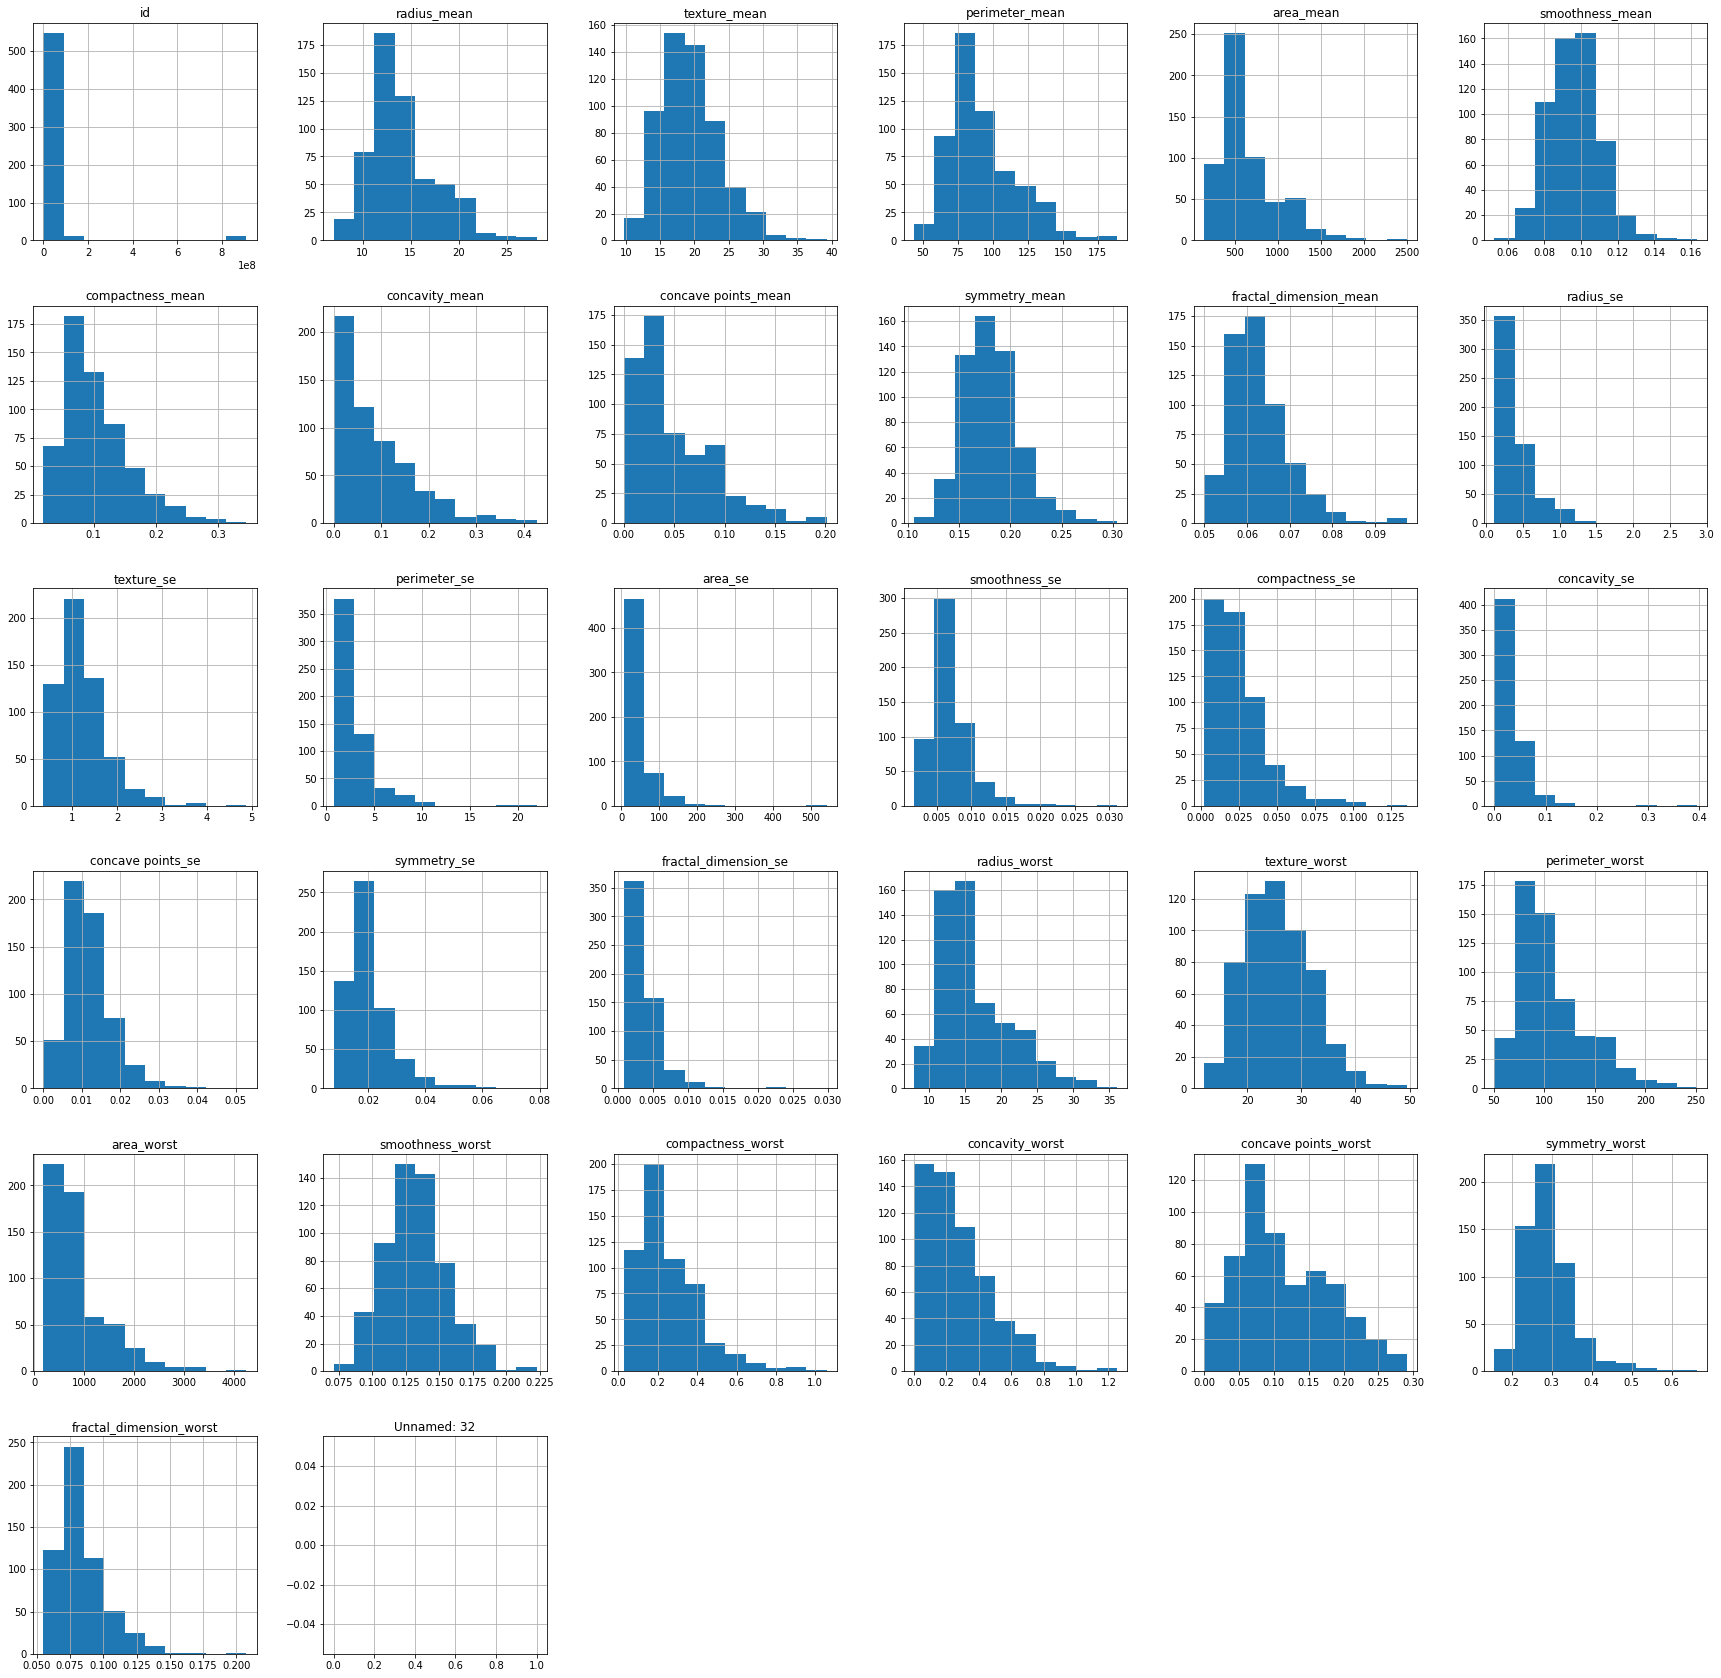

In [13]:
df.hist(figsize = (30,30))

In [14]:
# checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
# removing unknown column
df.drop('Unnamed: 32',axis = 1, inplace = True)

In [16]:
# categorical to numerical conversion
df1 = df
df1['diagnosis'].replace(['M','B'], [1,0], inplace = True)

In [17]:
df1.shape

(569, 32)

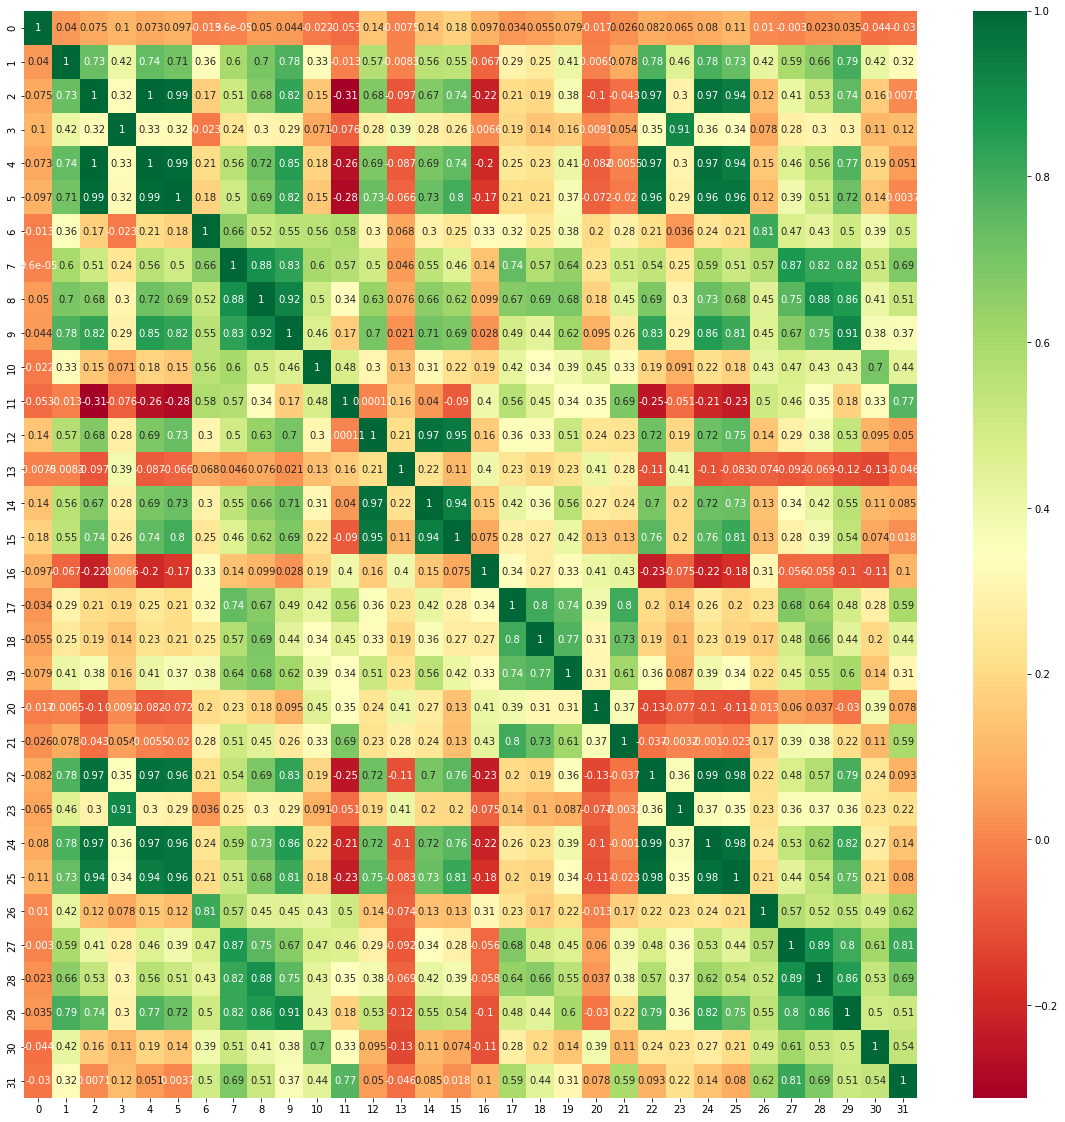

In [18]:
%matplotlib inline
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
# separating feature cols & target
feature_columns = df1.loc[:, df1.columns != 'diagnosis']
target_column = df1['diagnosis']

In [20]:
feature_columns.shape,target_column.shape 

((569, 31), (569,))

In [21]:
X = feature_columns
y = target_column

Decomposing large data using Principal Component Analysis

Scaling with StandardScalar

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.7 µs


In [23]:
pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.9 µs


In [24]:
X_train.shape, X_test.shape

((398, 3), (171, 3))

Text(0, 0.5, 'Second Principal Component')

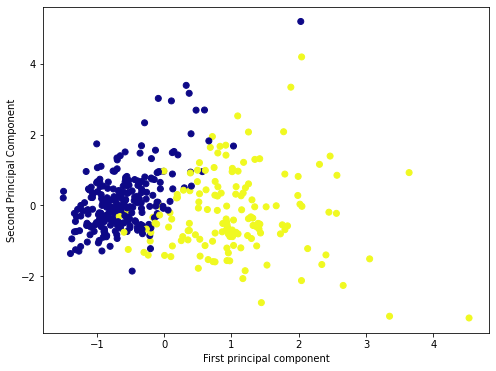

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [26]:
# model fitting with support vector classifier
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


In [27]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy Using OneAPI= {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using OneAPI= 0.789
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


SVC didn't yeild good results 


In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)
%time

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 10.3 µs


In [29]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy Using OneAPI = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using OneAPI = 0.930
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


In [31]:
# saving model 
import joblib
joblib.dump(model, "./RF_breast_cancer_OneAPI.joblib")
%time

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.3 µs


In [32]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()